In [1]:
import numpy as np

from sltns.data._data import TimeSeriesSimulator
from sltns.plots._plots import TimeSeriesPlotter

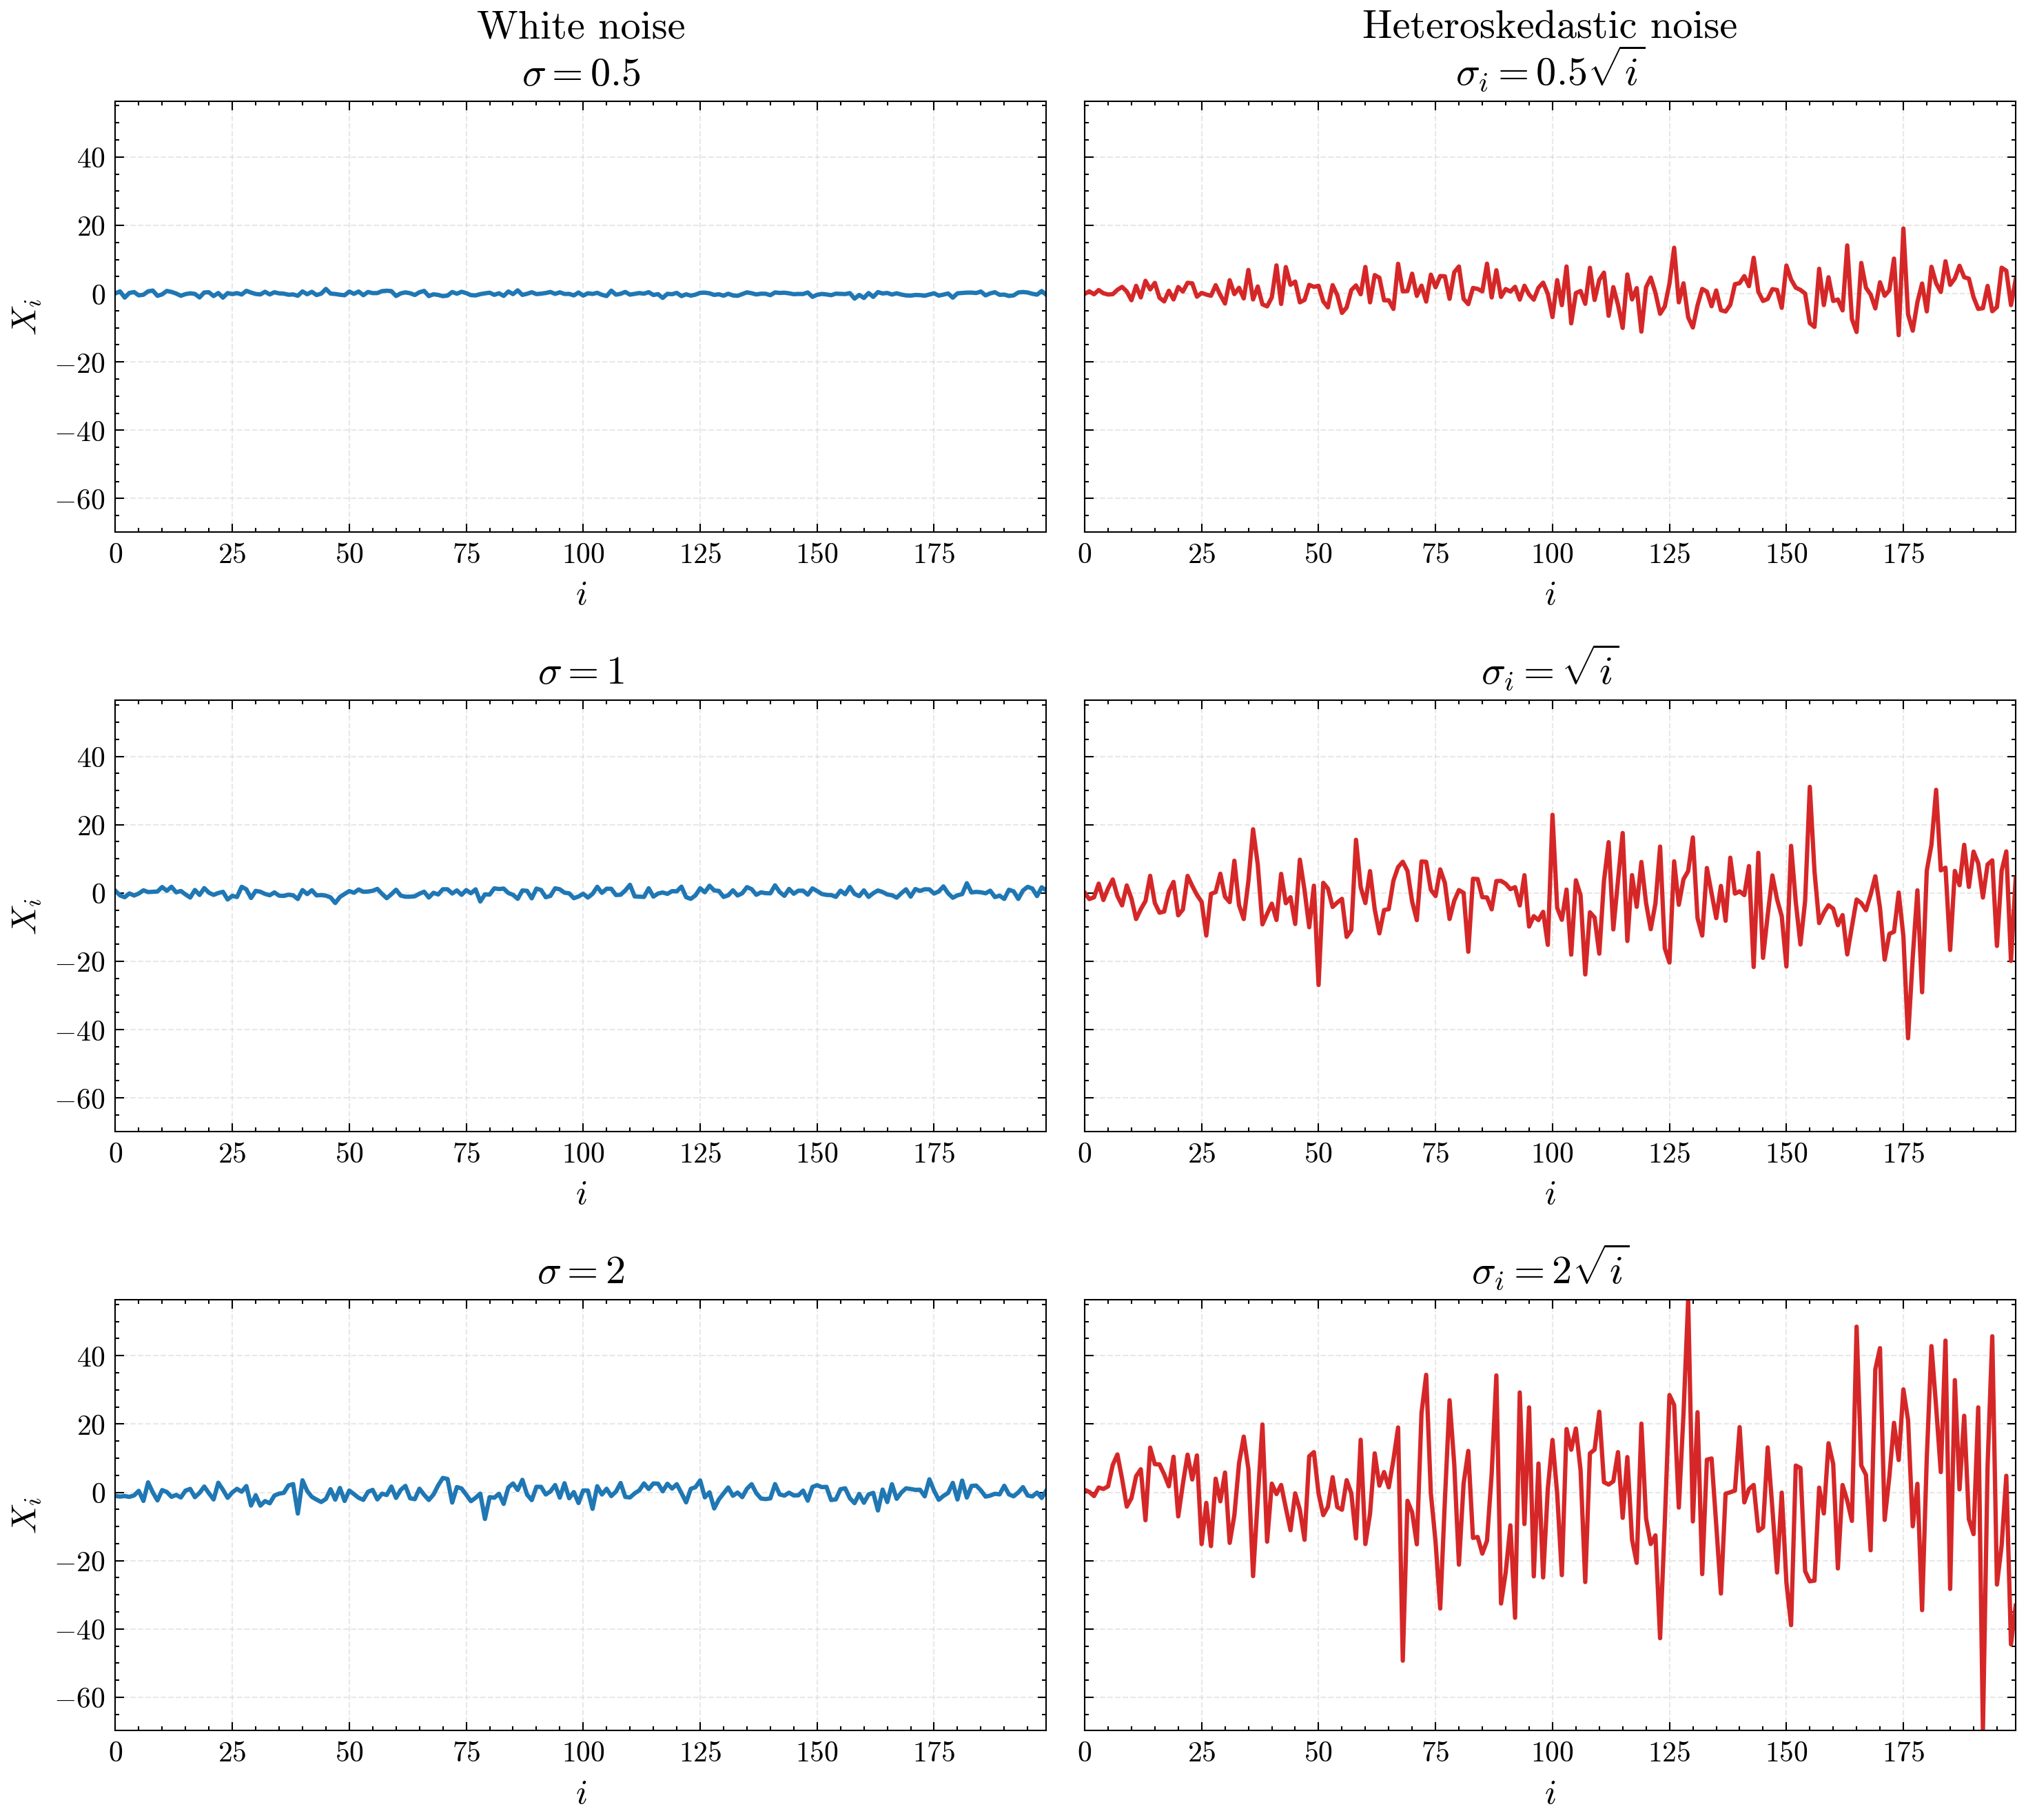

In [2]:
sigmas = [0.5, 1, 2]
configs = []
for σ in sigmas:
    configs.append({"kind": "white_noise", "sigma": σ})
    configs.append({"kind": "heteroskedastic", "sigma": σ, "normalize": False})

# 2) Simulate n time steps of all six processes at once:
n = 200
seed = 0
sim = TimeSeriesSimulator(configs=configs, n=n, seed=seed)
data = sim.generate()  # shape = (n, 6)

# 3) Split that into a list of 1-D arrays:
series_list = [data[:, i] for i in range(data.shape[1])]

# 4) Plot them just like before:
plotter = TimeSeriesPlotter(
    series_list=series_list,
    configs=configs,
    gridsize=(3, 2),
    style="science",
    grid=True,
    sharey=True,
    use_tex=False,
)
plotter.plot()
plotter.save("timestat.png", dpi=600, figsize=(10, 10), format="png")

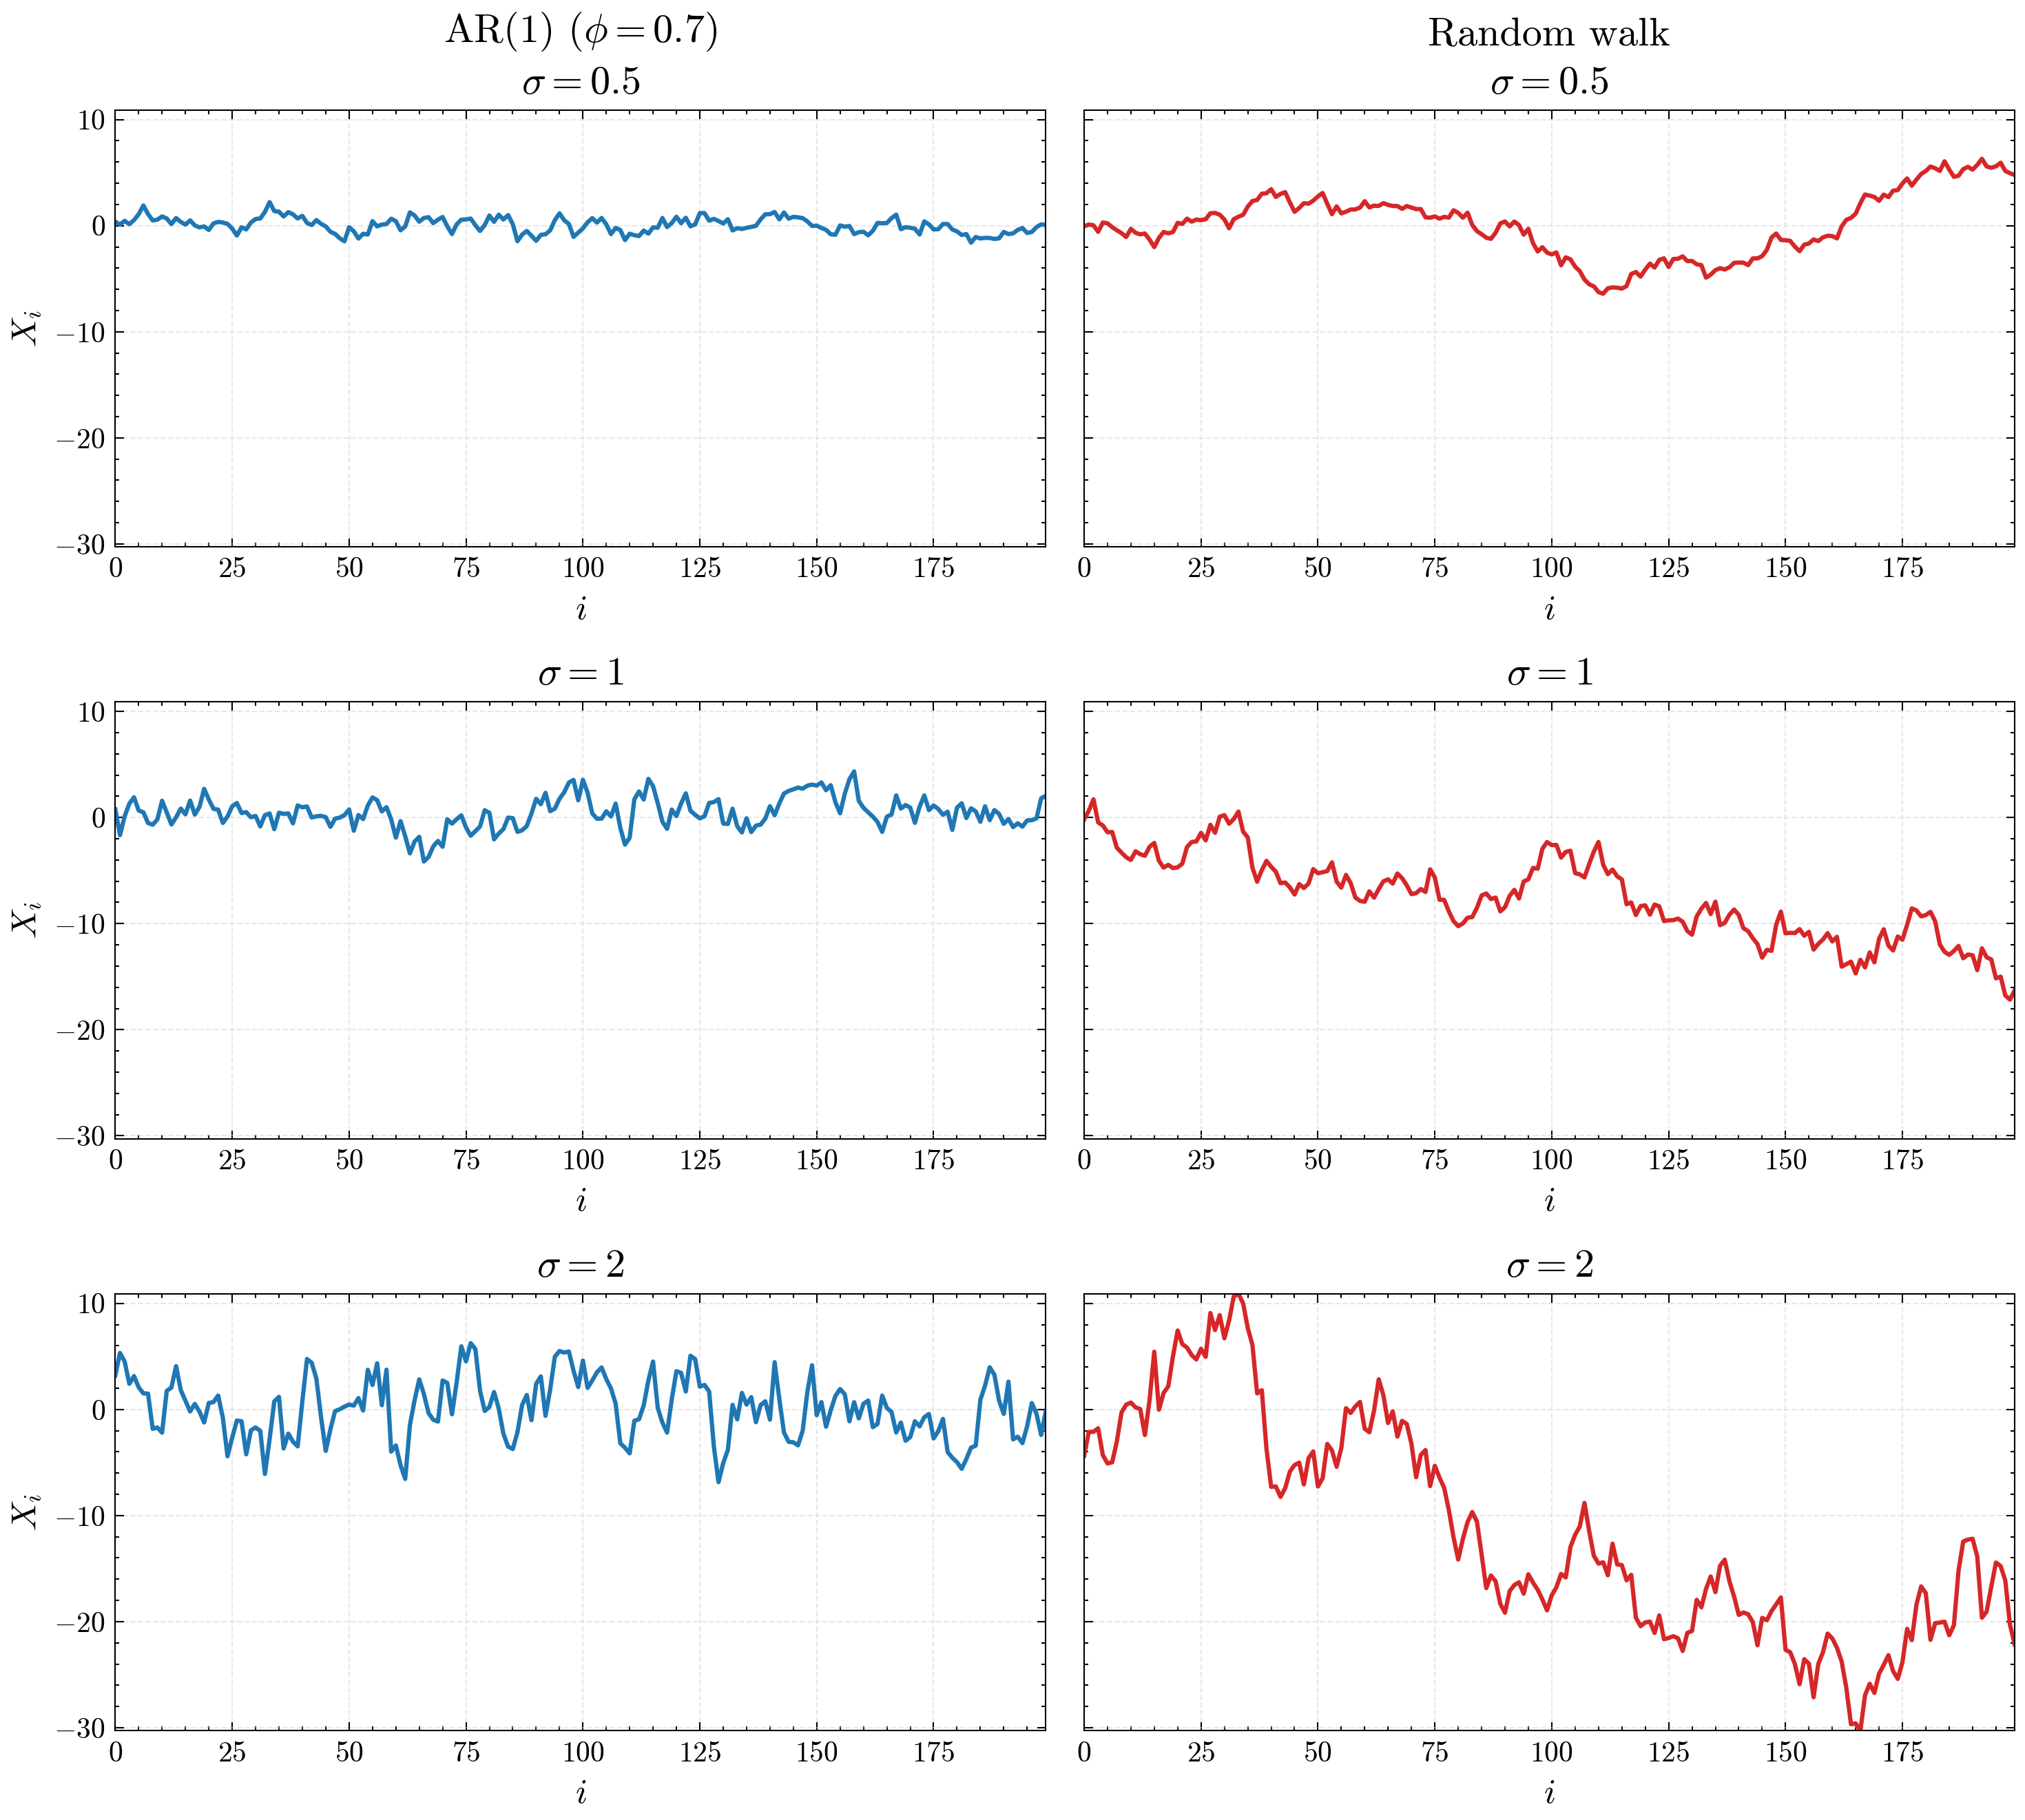

In [3]:
sigmas = [0.5, 1, 2]
configs = []
for σ in sigmas:
    configs.append({"kind": "ar1", "phi": 0.7, "sigma": σ})
    configs.append({"kind": "random_walk", "sigma": σ, "normalize": False})

n = 200
seed = 123
sim = TimeSeriesSimulator(configs=configs, n=n, seed=seed)
data = sim.generate()  # shape = (200, 6)

series_list = [data[:, i] for i in range(data.shape[1])]

plotter = TimeSeriesPlotter(
    series_list=series_list,
    configs=configs,
    gridsize=(3, 2),
    style="science",
    grid=True,
    sharey=True,
    use_tex=False,
)
plotter.plot()
plotter.save("timedep.png", dpi=600, figsize=(10, 10), format="png")

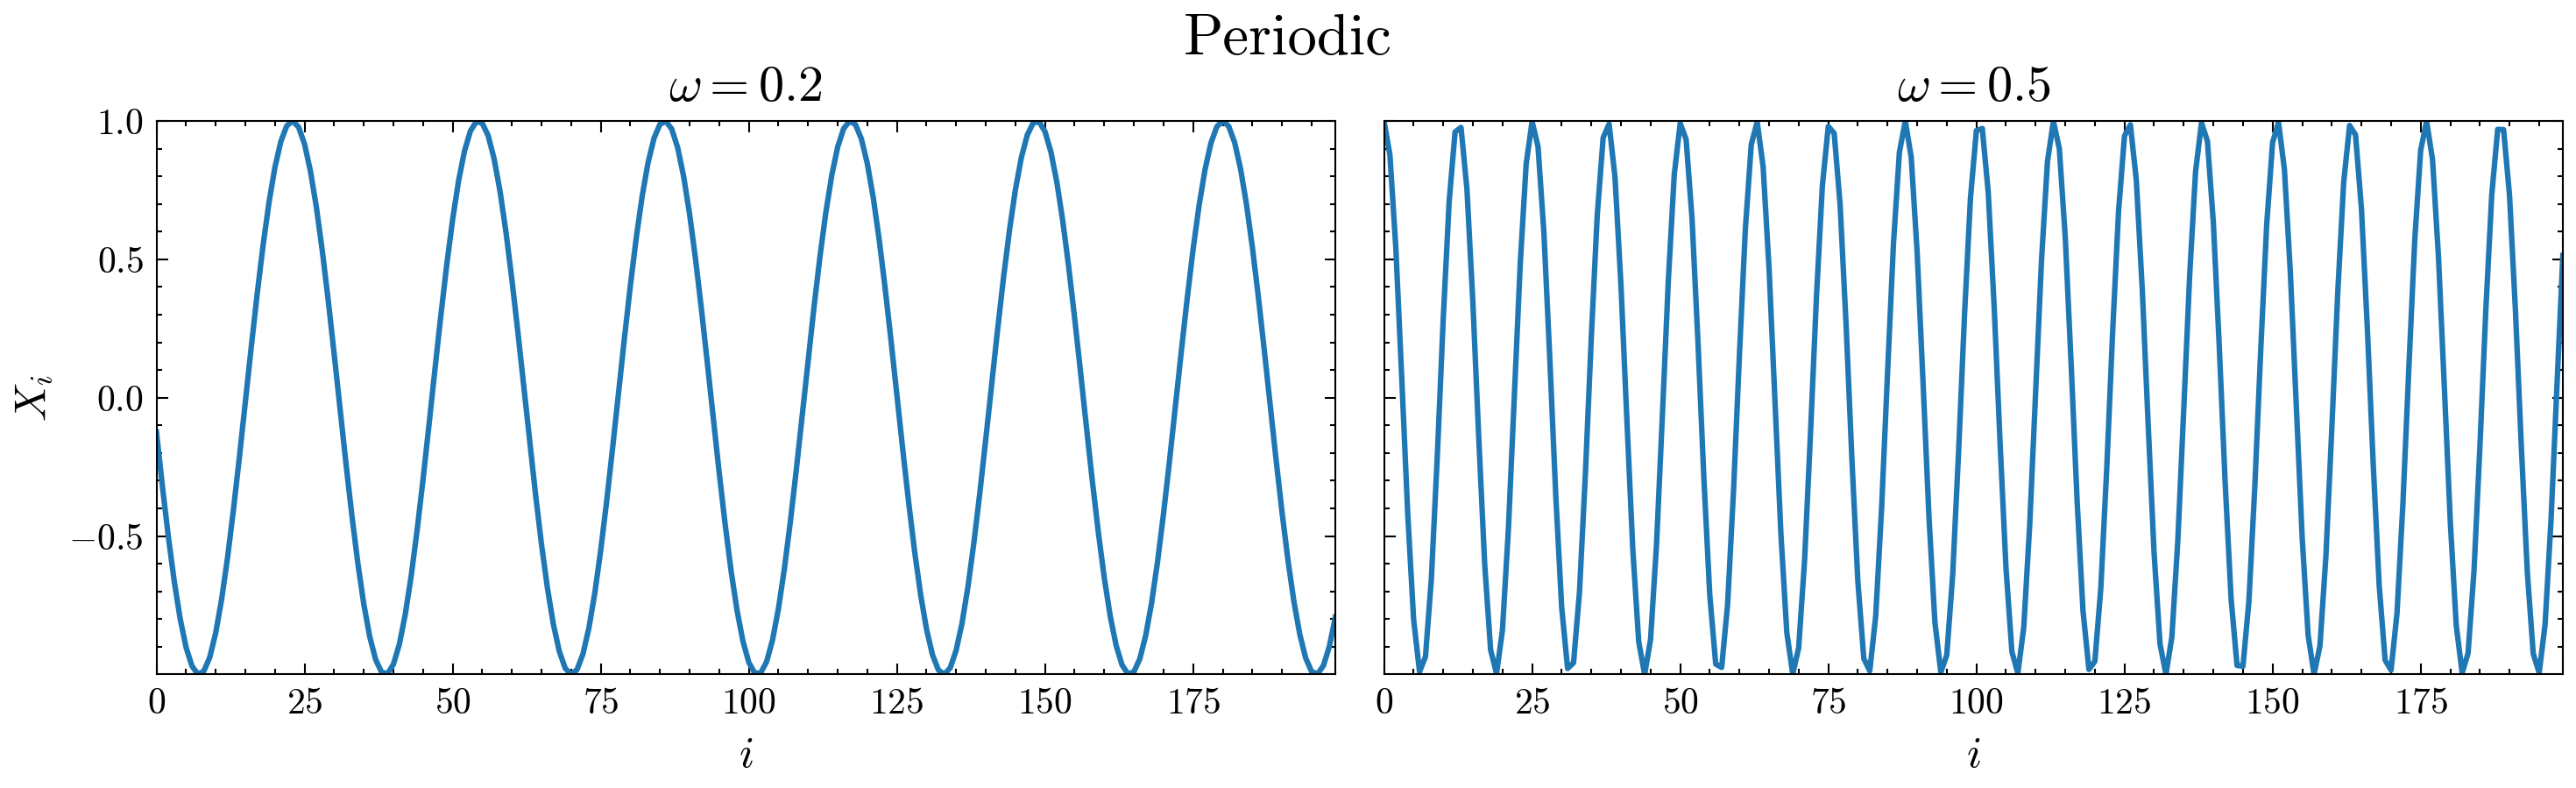

In [4]:
configs = [
    {"kind": "periodic", "omega": 0.2, "phase": True},
    {"kind": "periodic", "omega": 0.5, "phase": False},
]

n = 200
seed = 0
sim = TimeSeriesSimulator(configs=configs, n=n, seed=seed)
data = sim.generate()  # shape = (200, 2)
series_list = [data[:, i] for i in range(data.shape[1])]

plotter = TimeSeriesPlotter(
    series_list=series_list,
    configs=configs,
    gridsize=(1, 2),
    style="science",
    sharey=True,
)

plotter.plot()  # interactive display
plotter.save("timenonmix.png", dpi=600, figsize=(8, 3), format="png")

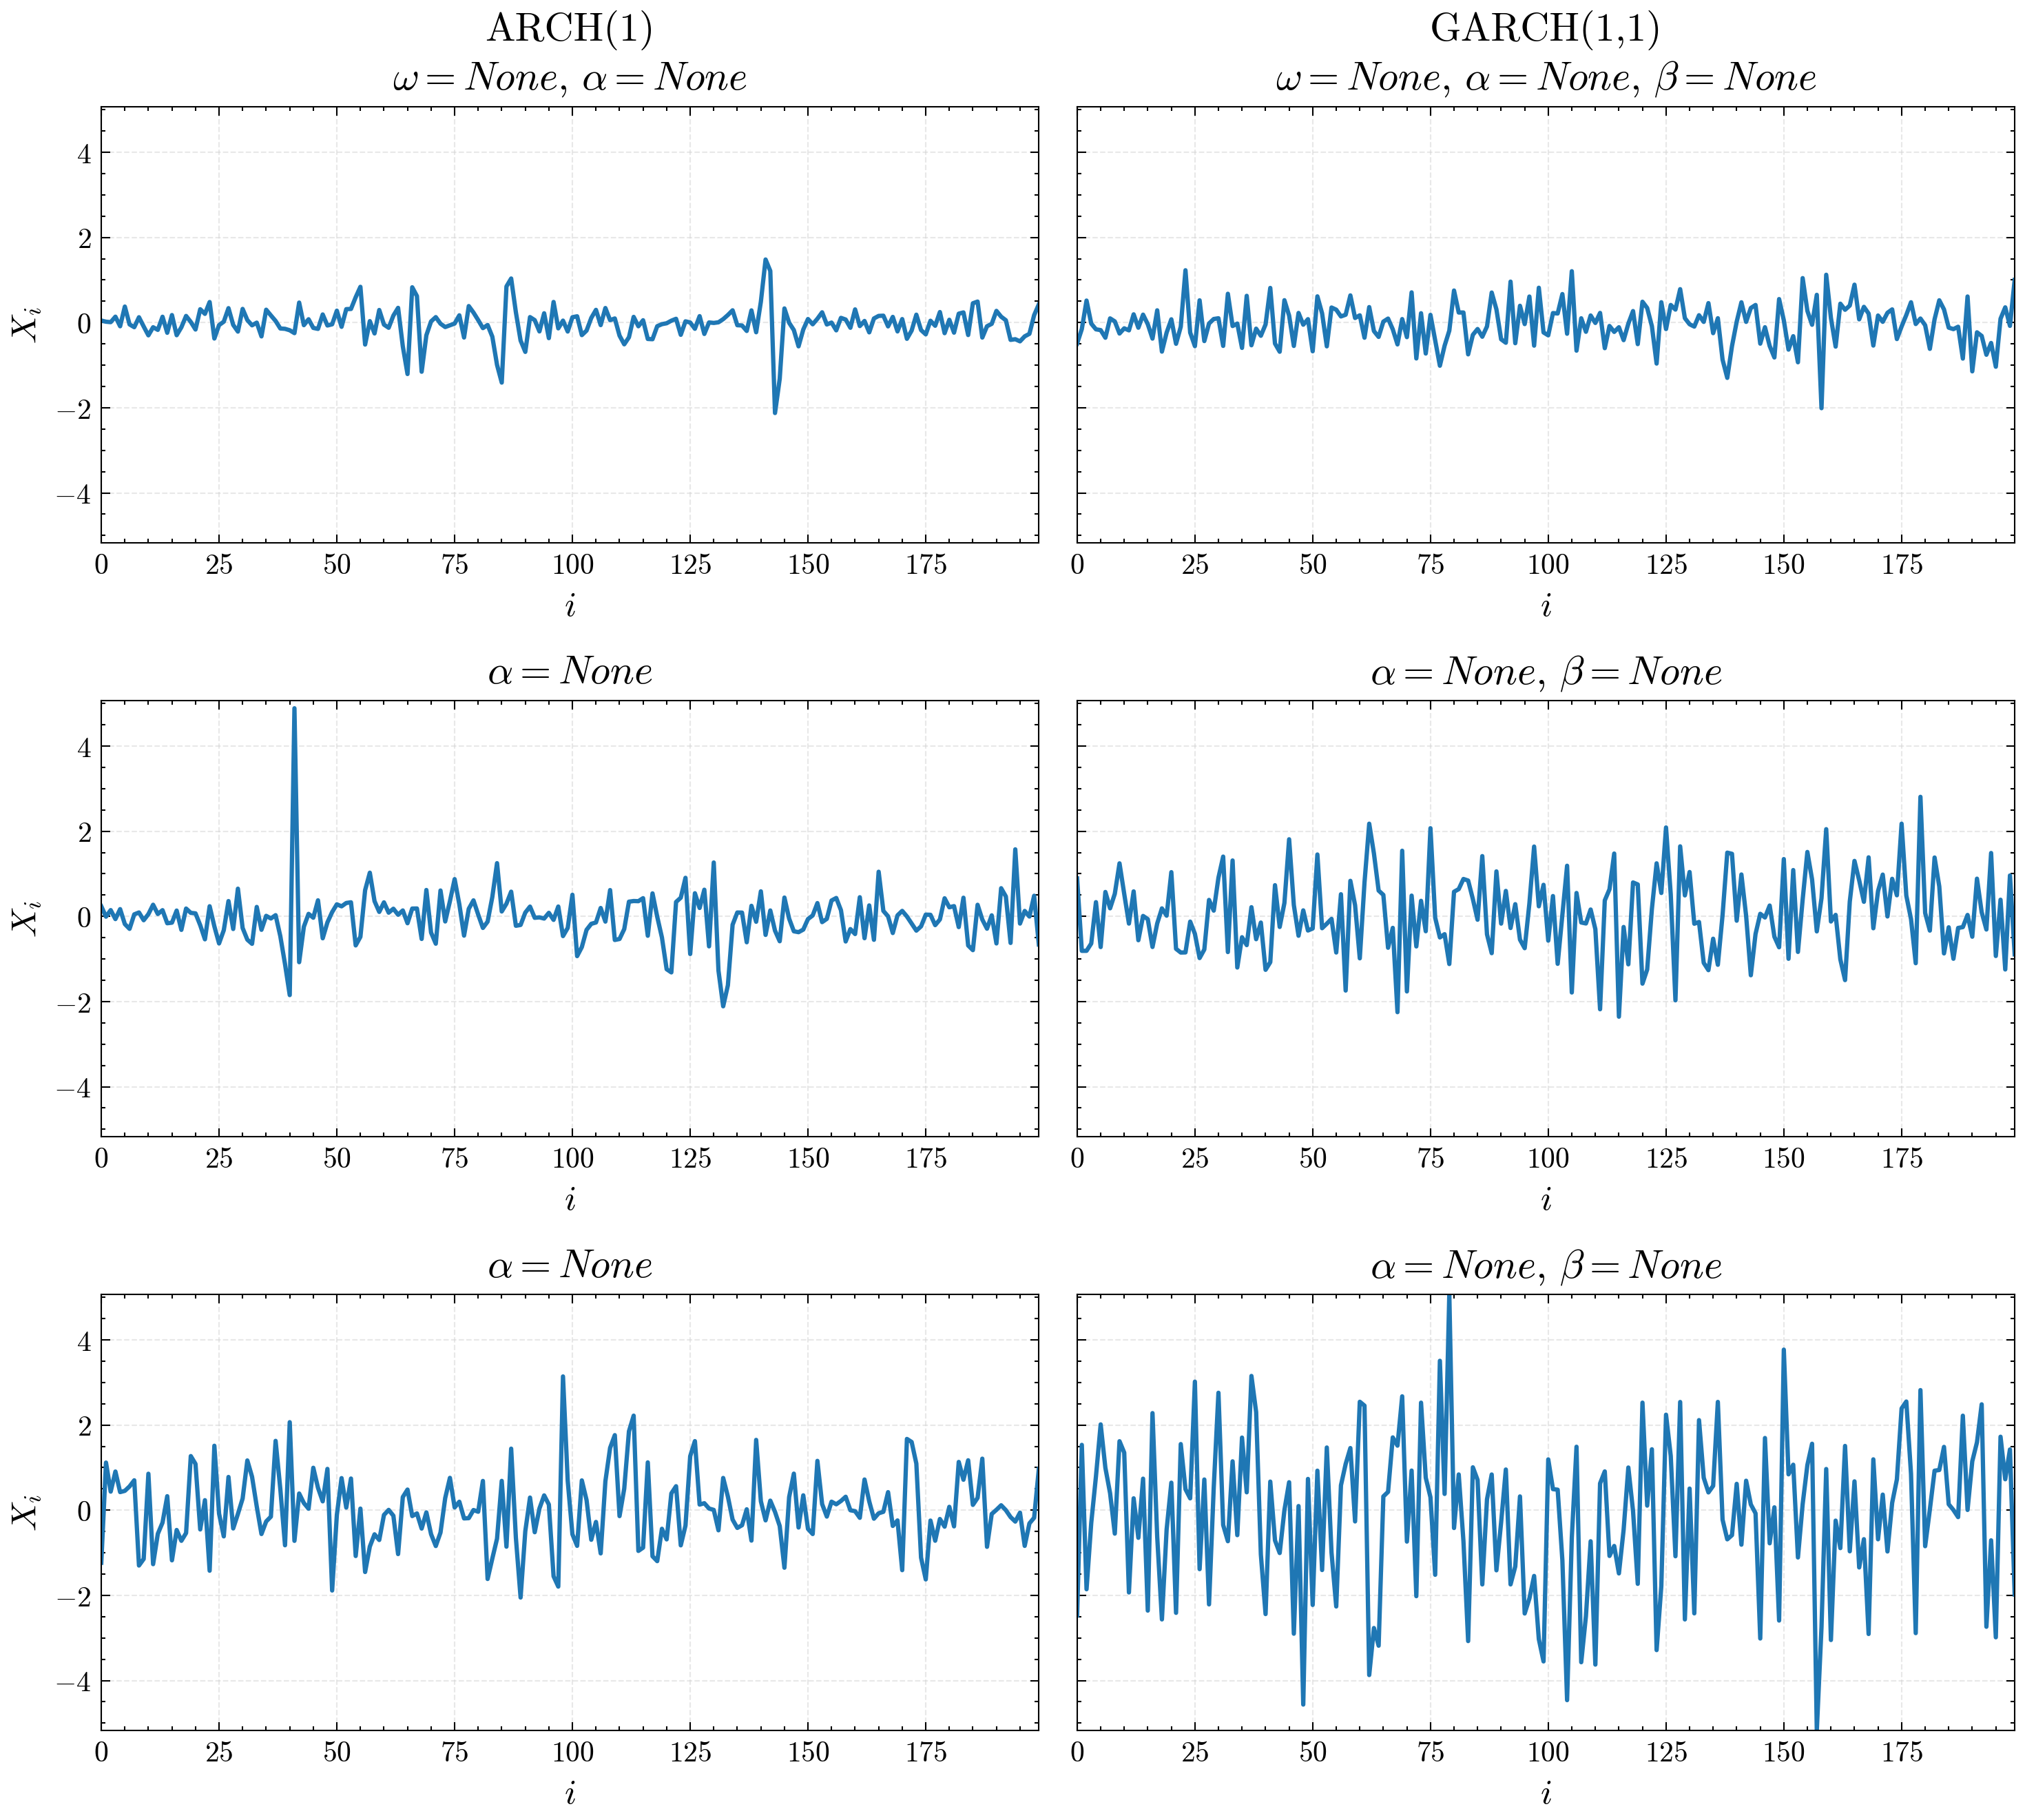

In [5]:
# 1) Build configs: for each σ, an ARCH and a GARCH process
sigmas = [0.5, 1.0, 2.0]
configs = []
for σ in sigmas:
    configs.append(
        {
            "kind": "arch",
            "sigma": σ,
            # you can also tune omega/alpha: e.g. "omega":0.1*σ**2, "alpha":0.8
        }
    )
    configs.append(
        {
            "kind": "garch",
            "sigma": σ,
            # default omega/alpha/beta from the simulator;
            # override here if you like, e.g. "alpha":0.1,"beta":0.85
        }
    )

# 2) Simulate all six series at once
n = 200
seed = 42
sim = TimeSeriesSimulator(configs=configs, n=n, seed=seed)
data = sim.generate()  # shape = (200, 6)

# 3) Unpack into a list of individual arrays
series_list = [data[:, i] for i in range(data.shape[1])]

# 4) Plot them in a 3×2 grid
plotter = TimeSeriesPlotter(
    series_list=series_list,
    configs=configs,
    gridsize=(3, 2),
    style="science",
    grid=True,
    sharey=True,
    use_tex=False,
)
plotter.plot()

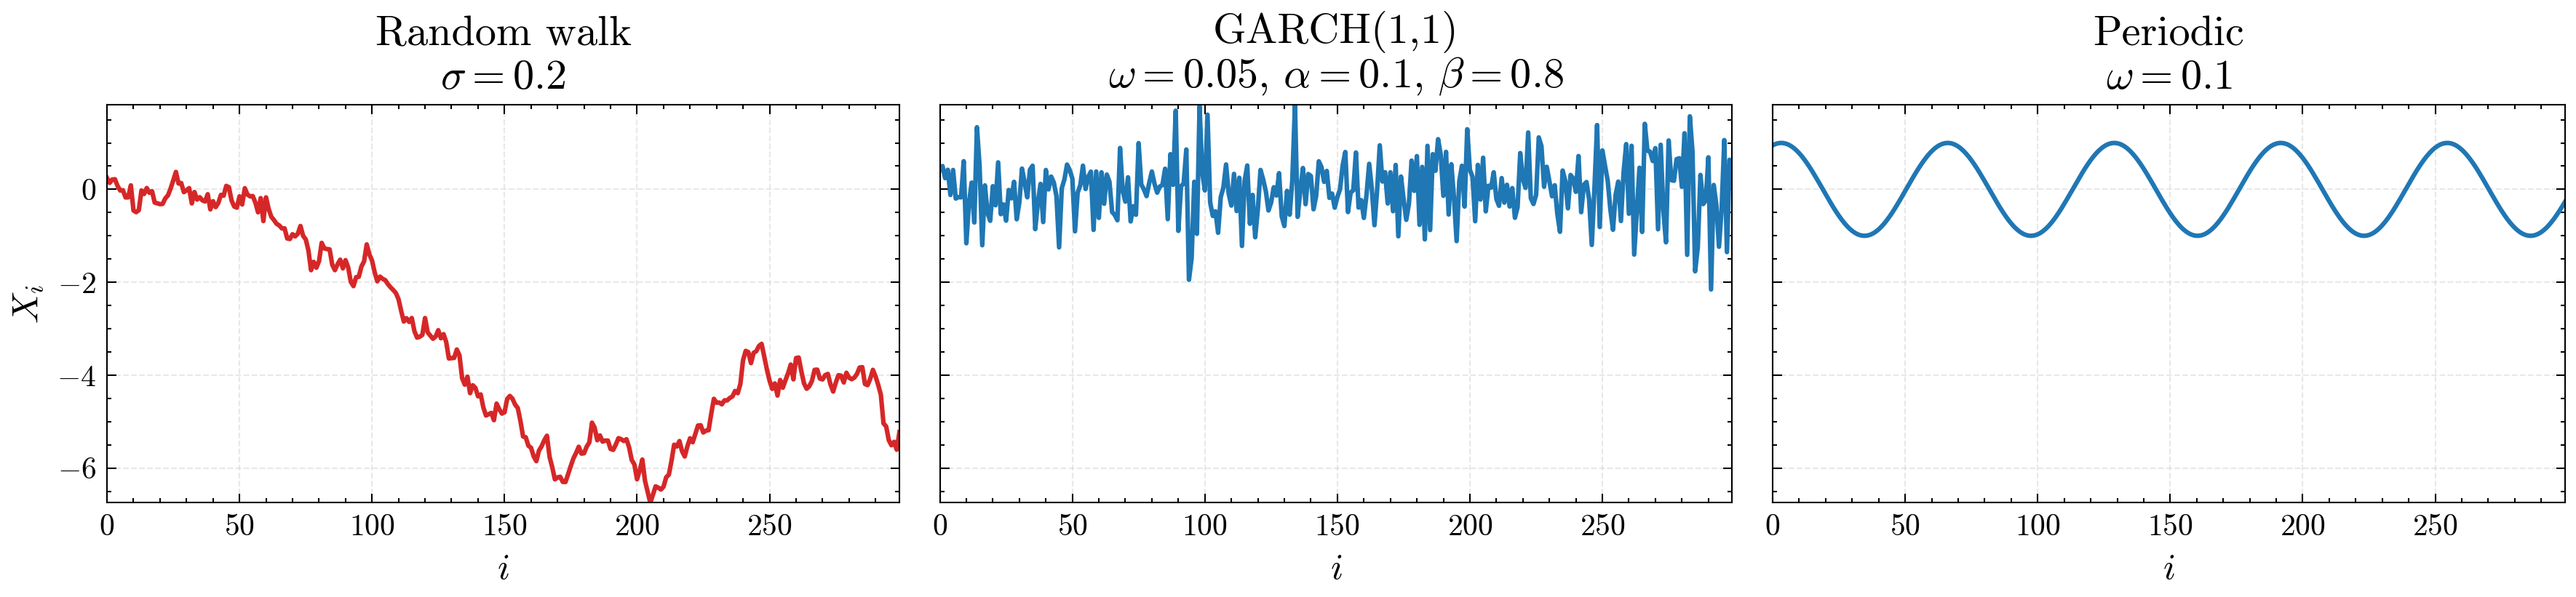

In [6]:
# 1) Generate several series
sim = TimeSeriesSimulator(
    configs=[
        {"kind": "random_walk", "sigma": 0.2},
        {"kind": "garch", "omega": 0.05, "alpha": 0.1, "beta": 0.8},
        {"kind": "periodic", "omega": 0.1},
    ],
    n=300,
    seed=1,
)
data = sim.generate()  # shape (300,3)
s1, s2, s3 = data[:, 0], data[:, 1], data[:, 2]

# 2) Plot them with exactly your old layout logic
plotter = TimeSeriesPlotter(
    series_list=[s1, s2, s3],
    configs=sim.configs,
    gridsize=(1, 3),
    figsize=(12, 3),
    sharey=True,
    grid=True,
)
plotter.plot()

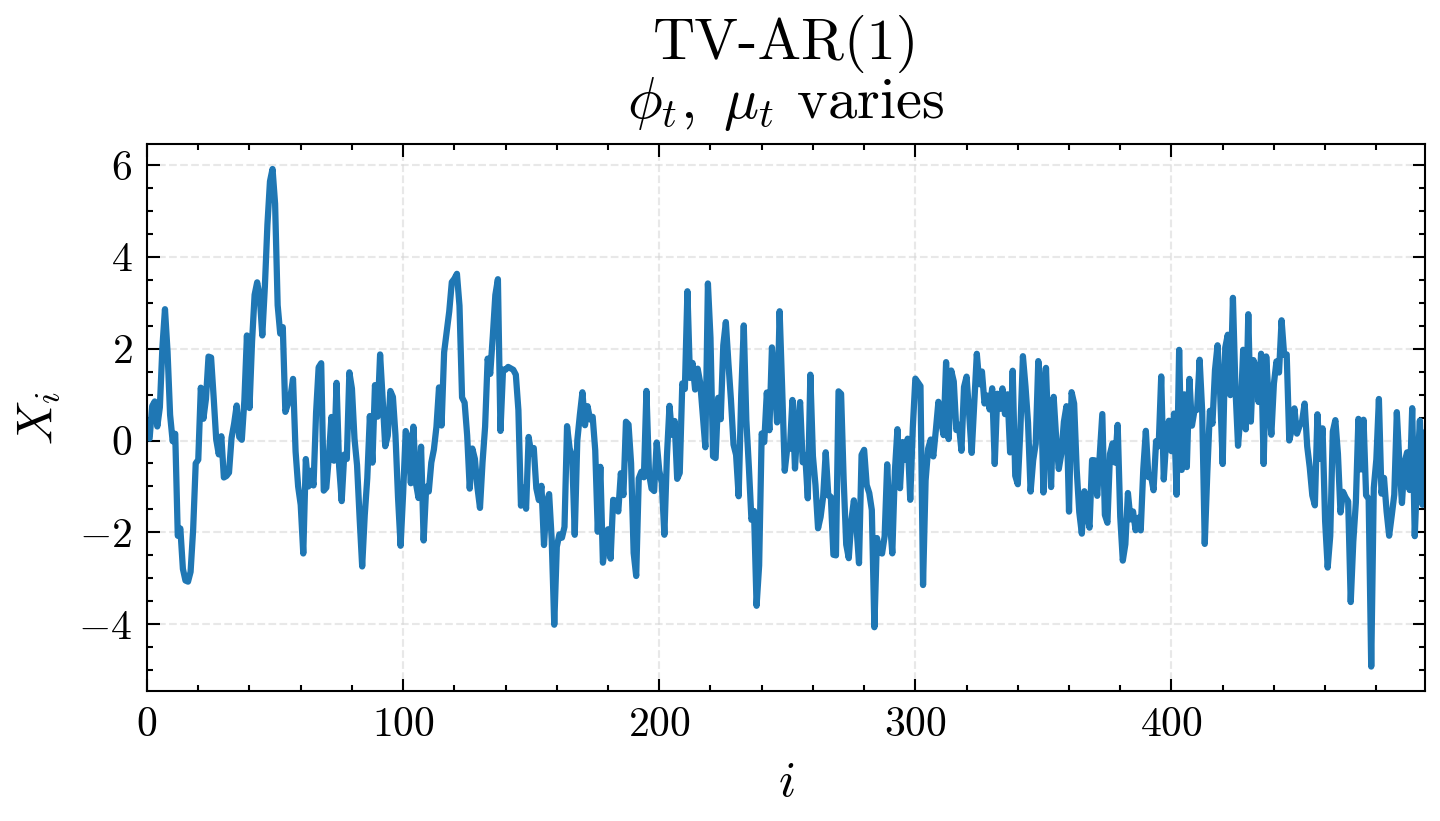

In [7]:
cfg = {
    "kind": "tv_ar1",
    "sigma": 1.0,
    "phi_trend": lambda u: 0.9 - 0.8 * u,  # φₜ goes 0.9→0.1 as u=t/n
    "mu_trend": lambda t: np.sin(2 * np.pi * t / 100),  # sinusoidal drift
}

# 2) simulate
n = 500
seed = 0
sim = TimeSeriesSimulator(configs=[cfg], n=n, seed=seed)
series = sim.generate().ravel()  # shape (500,)

# 3) plot
series_list = [series]
plotter = TimeSeriesPlotter(
    series_list=series_list,
    configs=[cfg],
    gridsize=(1, 1),
    style="science",
    grid=True,
    sharey=False,
)
plotter.plot()  # interactive

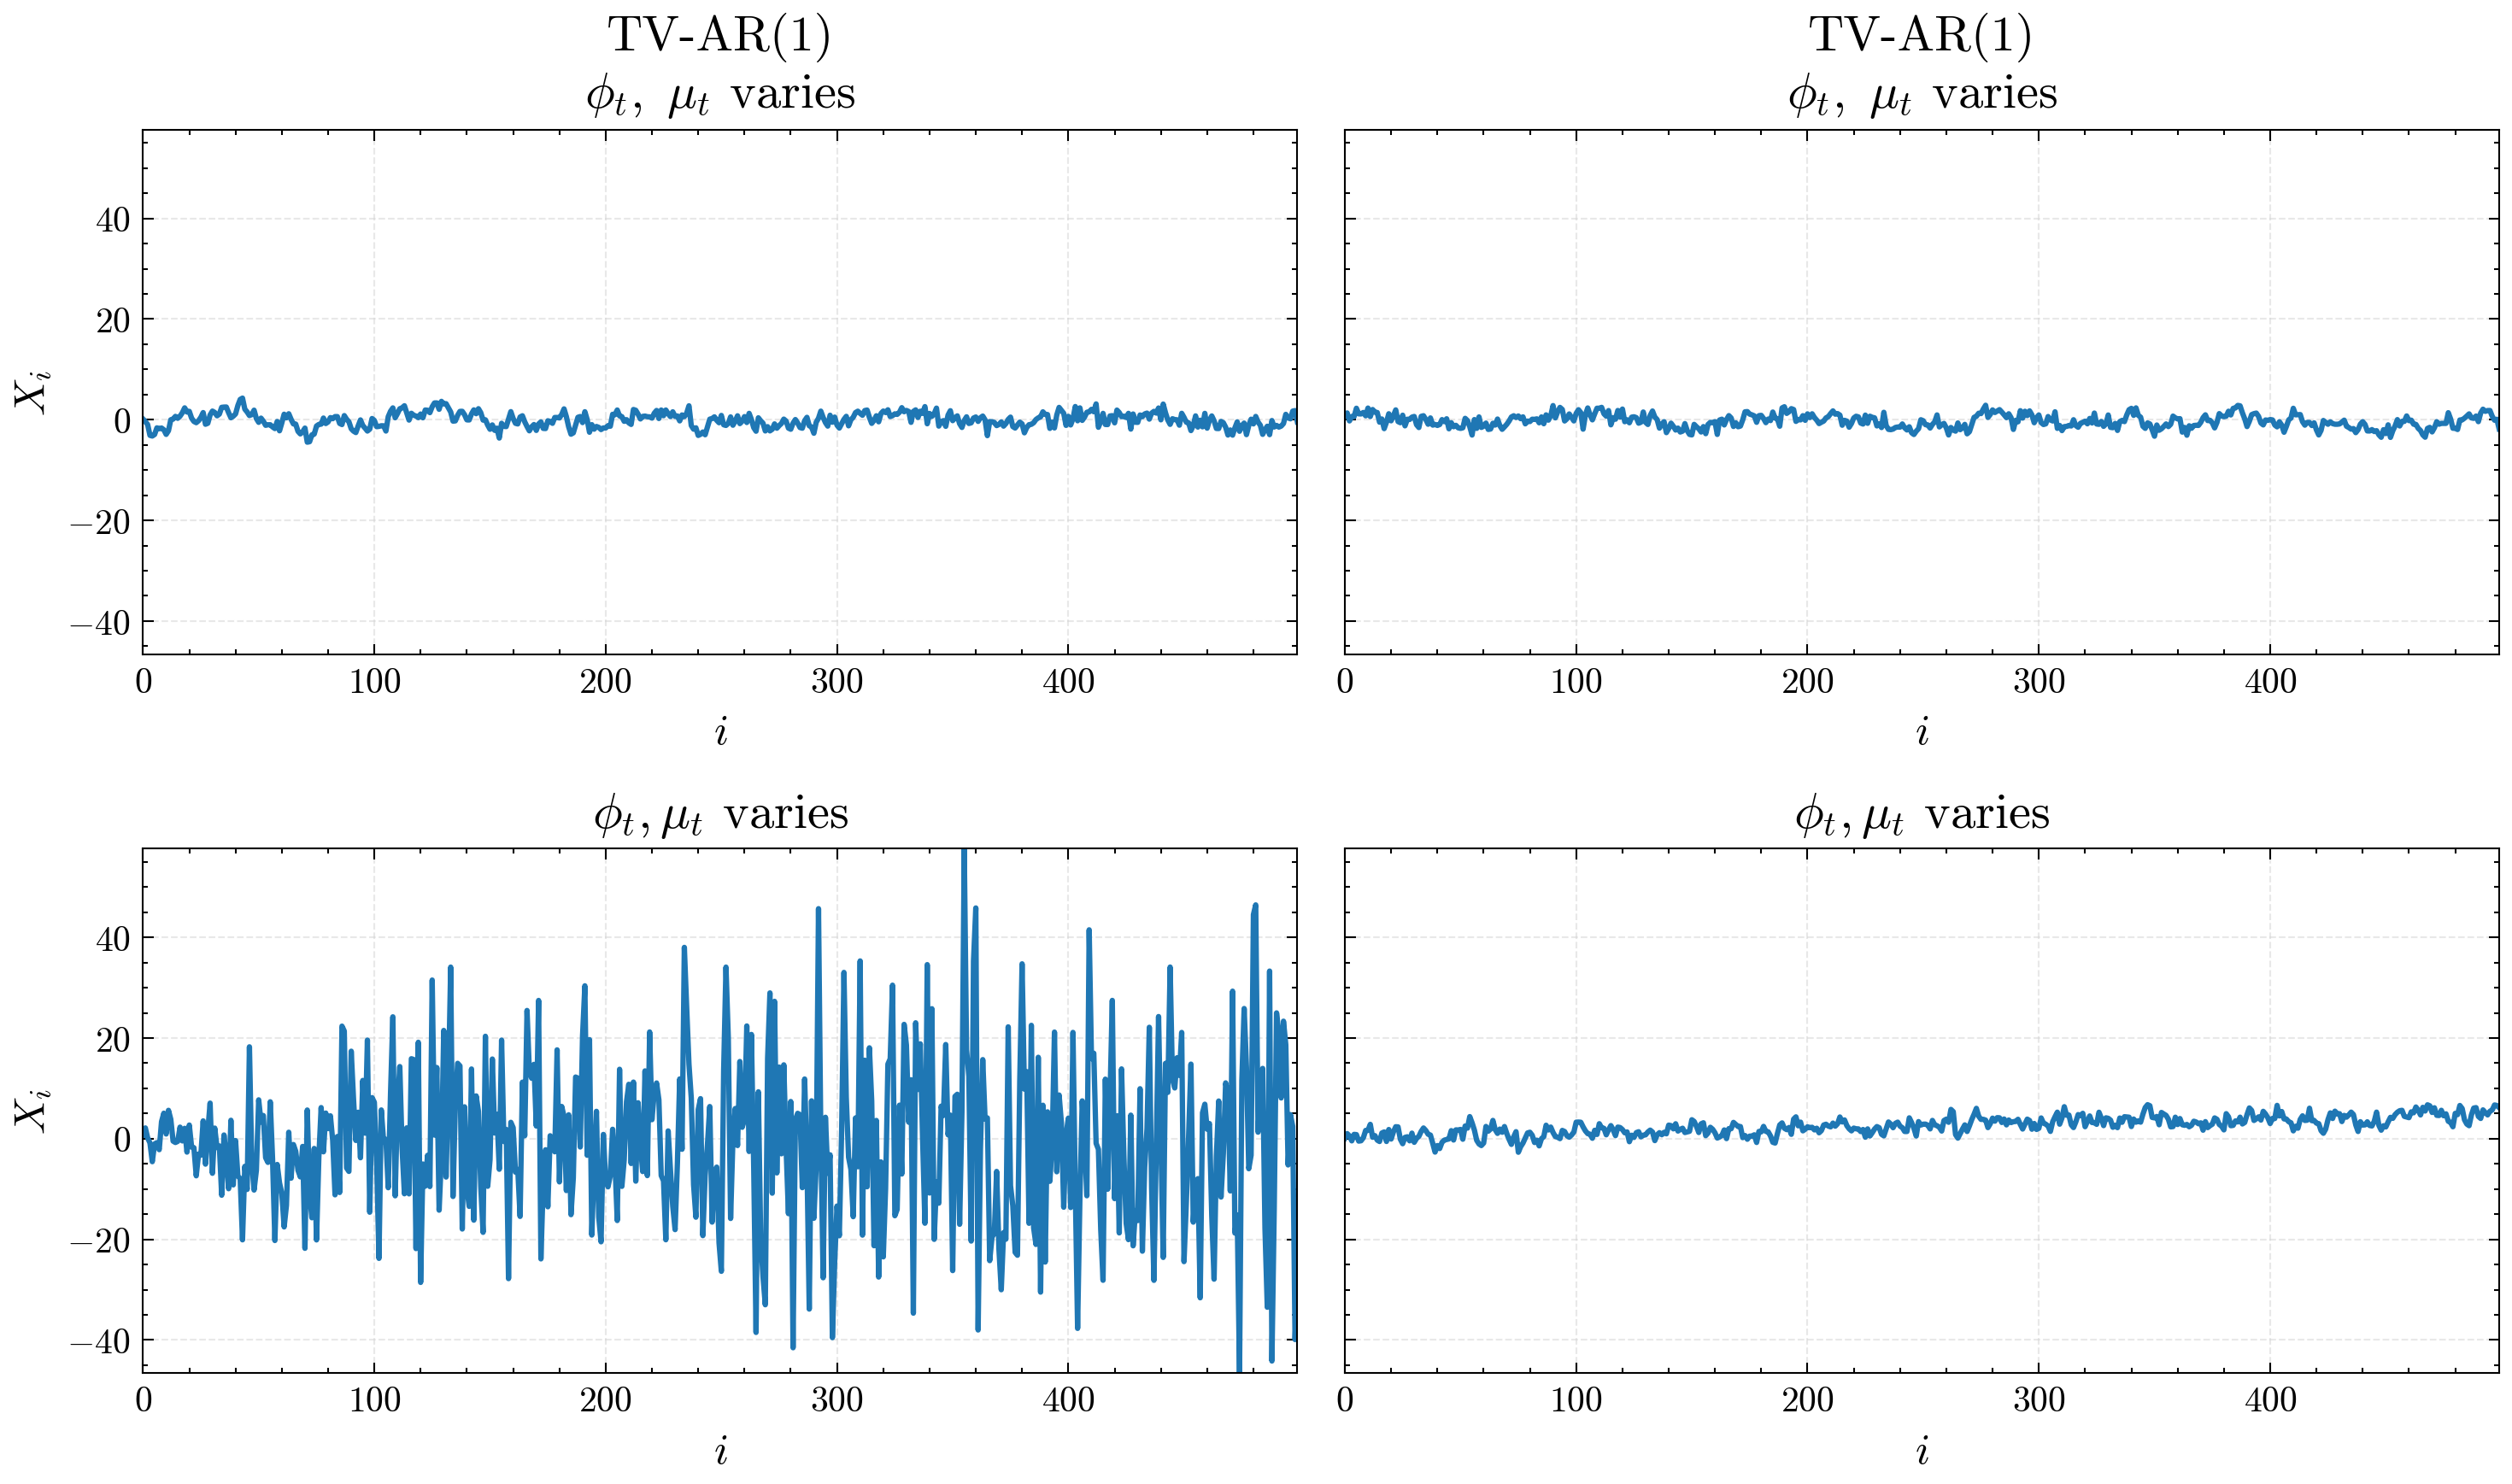

In [8]:
_tv_ar1_rng = np.random.default_rng(0)

configs = [
    {  # a) φ_t linearly decreasing, sinusoidal drift
        "kind": "tv_ar1",
        "sigma": 1.0,
        "phi_trend": lambda u: 0.9 - 0.8 * u,
        "mu_trend": lambda t: np.sin(2 * np.pi * t / 100),
    },
    {  # b) φ_t linearly increasing, cosine drift
        "kind": "tv_ar1",
        "sigma": 1.0,
        "phi_trend": lambda u: 0.1 + 0.8 * u,
        "mu_trend": lambda t: np.cos(2 * np.pi * t / 100),
    },
    {  # c) φ_t oscillates, random-walk drift
        "kind": "tv_ar1",
        "sigma": 1.0,
        "phi_trend": lambda u: 0.5 + 0.4 * np.sin(4 * np.pi * u),
        "mu_trend": lambda t, rng=_tv_ar1_rng: rng.standard_normal(t + 1).cumsum()[-1],
    },
    {  # d) φ_t constant (0.5), linear drift
        "kind": "tv_ar1",
        "sigma": 1.0,
        "phi_trend": lambda u: 0.5,
        "mu_trend": lambda t: 0.01 * t,
    },
]

# 2) Simulate each series
n = 500
seed = 0
sim = TimeSeriesSimulator(configs=configs, n=n, seed=seed)
data = sim.generate()  # shape = (500, 4)
series_list = [data[:, i] for i in range(4)]

# 3) Plot on a 2×2 grid
plotter = TimeSeriesPlotter(
    series_list=series_list,
    configs=configs,
    gridsize=(2, 2),
    style="science",
    grid=True,
    sharey=True,  # or False if you want independent y-scales
)

plotter.plot()